In [1]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#tp = plot_pc_graph_tikz(est_g, [String(k) for k in keys(df)])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(Graphs.SimpleGraphs.SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.919540761, 0.03493109))

In [2]:
include("../src/equations.jl")

generate_data

In [3]:
est_g

{5, 7} directed simple Int64 graph

In [4]:
using Plots, GraphRecipes

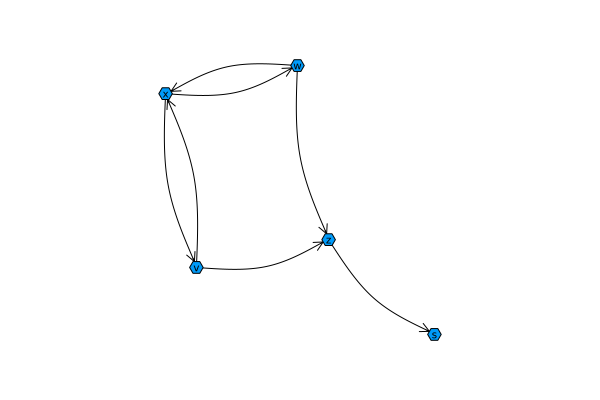

In [5]:

graphplot(est_g, names= [String(k) for k in keys(df)])

In [6]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)


(x = [0.06193274031408013, 0.2784058141640002, -0.5958244153640522, 0.04665938957338174, 1.0857940215432762, -1.5765649225859841, 0.1759399913010747, 0.8653808054093252, -2.790281005549307, -1.8920155582259128  …  -1.172869224619136, 0.9218177694319407, -0.46060170839179715, -0.9424506066689221, -0.6683350146660898, 1.13376245295865, 0.16017123470193892, 1.2035494780696616, -0.25218914788914293, 1.121665998910078], v = [-0.09250182220418984, 0.5675980897652538, -0.7140918730993022, -0.13985185939667483, 0.8654191143982632, -1.6179414873956435, 0.5908944698407181, 0.9484675082849228, -2.5323640793803697, -1.7979777572444016  …  -1.0046444212595644, 1.1717910105198648, -0.49022308208890647, -1.5455988844258108, -0.5526962435107993, 1.141418378235226, 0.8364713487518959, 1.1029217963545608, -0.5302228268986705, 1.1264197190628773], w = [0.36578689835494893, 0.8410329130812975, -0.8534652870632888, -0.2624374783168834, 0.8651710876085588, -1.3083709949188083, -0.07268315253075378, 1.250996

In [7]:
est_g, score = ges(df; penalty=1.0, parallel=true)


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.182981887, 8.9713e-5))

In [8]:
print(est_g)

SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])

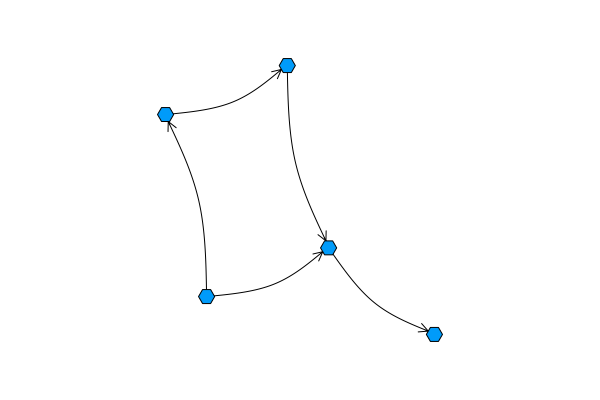

In [9]:
graphplot(pdag2dag!(est_g))

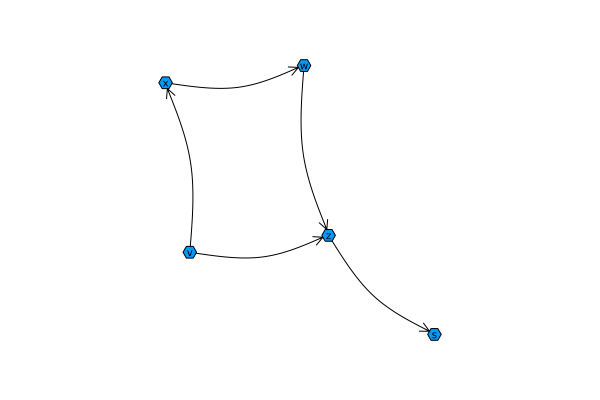

In [10]:
graphplot(est_g, names= [String(k) for k in keys(df)])

In [42]:
display(estimate_equations(df,est_g))

SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


In [12]:
display(estimate_equations(df,est_g))

node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

## With Actual Data

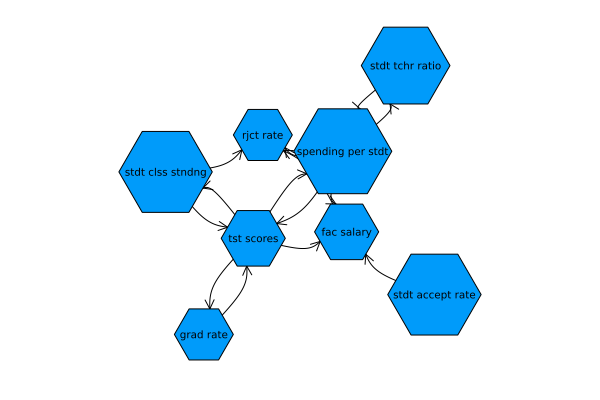

In [13]:
using HTTP, CSV, DataFrames
using CausalInference
using TikzGraphs
# If you have problems with TikzGraphs.jl, 
# try alternatively plotting backend GraphRecipes.jl + Plots.jl
# and corresponding plotting function `plot_pc_graph_recipes`

url = "https://www.ccd.pitt.edu//wp-content/uploads/files/Retention.txt"

df = DataFrame(CSV.File(HTTP.get(url).body))

# for now, pcalg and fcialg only accepts Float variables...
# this should change soon hopefully
for name in names(df)
	df[!, name] = convert(Array{Float64,1}, df[!,name])
end

# make variable names a bit easier to read
variables = map(x->replace(x,"_"=>" "), names(df))

est_g = pcalg(df, 0.025, gausscitest)

graphplot(est_g, names= variables)

In [14]:
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000


1000

In [15]:
est_dag= pdag2dag!(est_g)

{8, 10} directed simple Int64 graph

In [16]:
display(estimate_equations(df,est_dag))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[10974.511764705883], [-77.39989000350758, 2.0270937760689622], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [56.21395968402681, 0.0009066649373738409], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-1119.5117647058833, -447.51176470588325, -3070.5117647058833, -4373.511764705883, -3723.5117647058833, -4007.5117647058833, -2485.5117647058833, -1420.5117647058833, 4312.488235294117, -3917.5117647058833  …  -1169.5117647058833, -3757.5117647058833, -3325.5117647058833, -3959.5117647058833, 7371.488235294117, 188.48823529411675, -2312.5117647058833, -1499.5117647058833, -2868.5117647058833, -5555.511764705883], [-1.9889123488673022, -2.4014750052810996, -7.9960568

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [17]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[10974.511764705883], [-77.39989000350758, 2.0270937760689622], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [56.21395968402681, 0.0009066649373738409], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-1119.5117647058833, -447.51176470588325, -3070.5117647058833, -4373.511764705883, -3723.5117647058833, -4007.5117647058833, -2485.5117647058833, -1420.5117647058833, 4312.488235294117, -3917.5117647058833  …  -1169.5117647058833, -3757.5117647058833, -3325.5117647058833, -3959.5117647058833, 7371.488235294117, 188.48823529411675, -2312.5117647058833, -1499.5117647058833, -2868.5117647058833, -5555.511764705883], [-1.9889123488673022, -2.4014750052810996, -7.9960568

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [18]:
display(estimate_equations_test(df,est_g))

UndefVarError: UndefVarError: `estimate_equations_test` not defined

In [19]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[10974.511764705883], [-77.39989000350758, 2.0270937760689622], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [56.21395968402681, 0.0009066649373738409], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-1119.5117647058833, -447.51176470588325, -3070.5117647058833, -4373.511764705883, -3723.5117647058833, -4007.5117647058833, -2485.5117647058833, -1420.5117647058833, 4312.488235294117, -3917.5117647058833  …  -1169.5117647058833, -3757.5117647058833, -3325.5117647058833, -3959.5117647058833, 7371.488235294117, 188.48823529411675, -2312.5117647058833, -1499.5117647058833, -2868.5117647058833, -5555.511764705883], [-1.9889123488673022, -2.4014750052810996, -7.9960568

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [20]:
simplecyclescount(est_g)

0

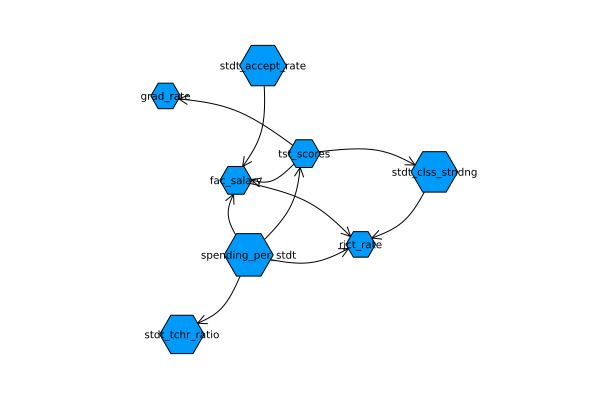

In [21]:
graphplot(est_g, names= names(df), nodesize=0.05)

In [22]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[10974.511764705883], [-77.39989000350758, 2.0270937760689622], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [56.21395968402681, 0.0009066649373738409], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-1119.5117647058833, -447.51176470588325, -3070.5117647058833, -4373.511764705883, -3723.5117647058833, -4007.5117647058833, -2485.5117647058833, -1420.5117647058833, 4312.488235294117, -3917.5117647058833  …  -1169.5117647058833, -3757.5117647058833, -3325.5117647058833, -3959.5117647058833, 7371.488235294117, 188.48823529411675, -2312.5117647058833, -1499.5117647058833, -2868.5117647058833, -5555.511764705883], [-1.9889123488673022, -2.4014750052810996, -7.9960568

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [23]:
scm= estimate_equations(df,est_g)

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[10974.511764705883], [-77.39989000350758, 2.0270937760689622], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [56.21395968402681, 0.0009066649373738409], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-1119.5117647058833, -447.51176470588325, -3070.5117647058833, -4373.511764705883, -3723.5117647058833, -4007.5117647058833, -2485.5117647058833, -1420.5117647058833, 4312.488235294117, -3917.5117647058833  …  -1169.5117647058833, -3757.5117647058833, -3325.5117647058833, -3959.5117647058833, 7371.488235294117, 188.48823529411675, -2312.5117647058833, -1499.5117647058833, -2868.5117647058833, -5555.511764705883], [-1.9889123488673022, -2.4014750052810996, -7.9960568

### Testing cycles

In [24]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

# Create a DataFrame from the named tuple df
df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)

┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


ArgumentError: ArgumentError: The provided graph is cyclic -> est_g::DiGraph should be a DAG.

In [25]:
# Overload graphplot for SCM
function GraphRecipes.graphplot(scm::SCM; kwargs...)
    GraphRecipes.graphplot(scm.dag; kwargs...)
end

In [26]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)


node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

In [27]:
is_cyclic(est_g)

false

### estimating equations scm

In [28]:
display(estimate_equations(df, est_g))

SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


In [29]:
scm = estimate_equations_test(df, est_g)

UndefVarError: UndefVarError: `estimate_equations_test` not defined

In [30]:
scm.variables

8-element Vector{String}:
 "spending_per_stdt"
 "grad_rate"
 "stdt_clss_stndng"
 "rjct_rate"
 "tst_scores"
 "stdt_accept_rate"
 "stdt_tchr_ratio"
 "fac_salary"

In [31]:
scm.coefficients

8-element Vector{Vector{Float64}}:
 [10974.511764705883]
 [-77.39989000350758, 2.0270937760689622]
 [-138.89318757396273, 2.680484396527218]
 [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734]
 [56.21395968402681, 0.0009066649373738409]
 [43.17310588235294]
 [20.57733533157175, -0.0004092086135238483]
 [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]

In [32]:
df=DataFrame(df)

Row,x,v,w,z,s
,Float64,Float64,Float64,Float64,Float64
1,0.0619327,-0.0925018,0.365787,0.00585492,-0.330166
2,0.278406,0.567598,0.841033,1.90745,2.08259
3,-0.595824,-0.714092,-0.853465,-1.66625,-2.00072
4,0.0466594,-0.139852,-0.262437,-0.724986,-0.864001
5,1.08579,0.865419,0.865171,1.2846,1.03755
6,-1.57656,-1.61794,-1.30837,-2.96285,-2.61467
7,0.17594,0.590894,-0.0726832,0.484619,0.490356
8,0.865381,0.948468,1.251,2.22934,2.23827
9,-2.79028,-2.53236,-2.60523,-5.07867,-5.04167


In [33]:
df_generated= generate_data(scm, 2000)


Row,stdt_accept_rate,spending_per_stdt,tst_scores,grad_rate,stdt_clss_stndng,stdt_tchr_ratio,fac_salary,rjct_rate
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,55.6897,16204.5,74.4443,65.9764,39.4861,7.81263,73049.8,47.3193
2,39.8937,10676.5,67.871,56.5488,68.4486,16.069,55786.5,32.0538
3,30.6063,13604.4,63.593,57.3596,51.2606,20.8207,60465.5,40.0841
4,46.0352,15077.4,70.7524,64.712,52.5432,16.9498,71884.1,26.4318
5,54.8609,13269.2,69.5528,57.3518,65.2151,19.0362,59901.5,54.465
6,33.0954,14686.5,72.9846,61.4941,76.8712,21.6731,65731.3,18.0786
7,36.8859,19958.4,74.5056,74.9231,64.192,11.9615,69879.6,59.2178
8,42.6954,11571.4,62.1928,49.5992,19.0781,18.1551,60460.8,17.6505
9,41.6205,3620.37,62.1535,62.2171,18.5559,27.8502,51022.1,13.3955


In [35]:
mean(df_generated[!,"v"])

ArgumentError: ArgumentError: column name :v not found in the data frame

In [36]:
mean(df[!,"v"])

0.024585909228746365

In [37]:
std(df_generated[!,"v"])

ArgumentError: ArgumentError: column name :v not found in the data frame

In [38]:
std(df[!,"v"])

1.0696022470495525

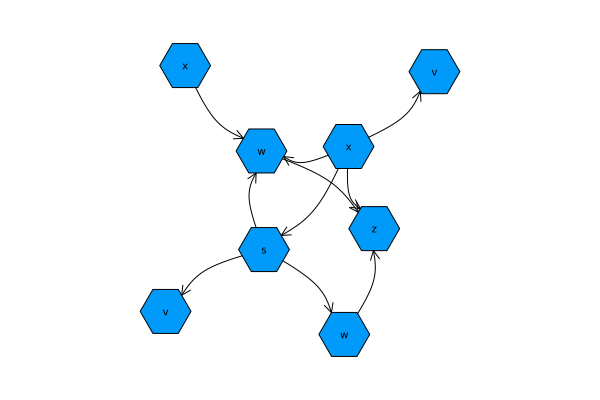

In [39]:
graphplot(scm.dag,  names= names(df), nodesize=0.5)

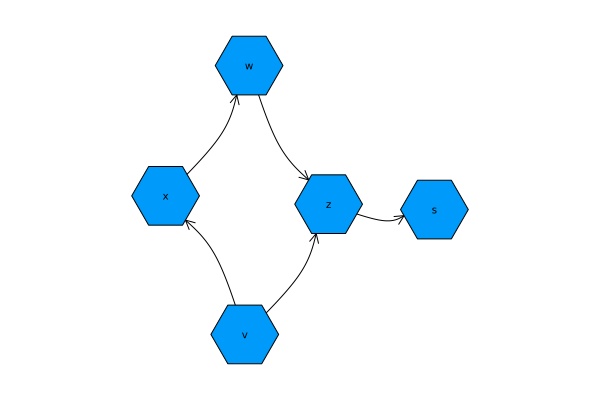

In [40]:
graphplot(est_g,  names= names(df), nodesize=0.5)

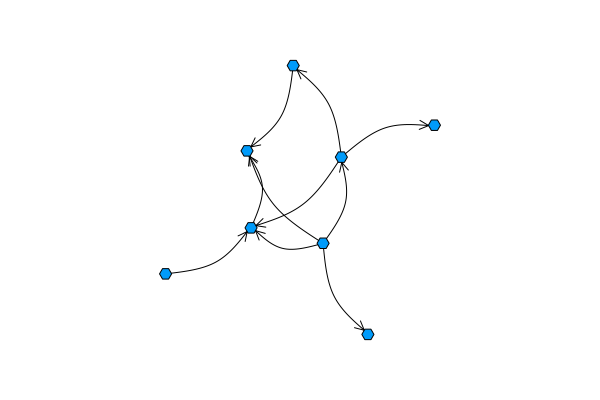

In [41]:
graphplot(scm)